In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
import nltk
from nltk import word_tokenize
import string, re
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#nltk.download('wordnet')

In [39]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Websites
# 8. Deployments

### **1. Data Cleaning**

In [40]:
data = pd.read_csv("train.csv",encoding='ISO-8859-1')
data

Category                                         Email Text
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [41]:
data.isnull().sum()

Category      0
Email Text    0
dtype: int64

In [42]:
data.duplicated().sum()

403

In [43]:
data = data.drop_duplicates(keep = 'first')

In [44]:
data.duplicated().sum()

0

In [45]:
data = data.reset_index(drop = True)
data

Category                                         Email Text
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5164     spam  This is the 2nd time we have tried 2 contact u...
5165      ham              Will Ì_ b going to esplanade fr home?
5166      ham  Pity, * was in mood for that. So...any other s...
5167      ham  The guy did some bitching but I acted like i'd...
5168      ham                         Rofl. Its true to its name

[5169 rows x 2 columns]

In [46]:
data.shape

(5169, 2)

## 2. EDA

In [47]:
print(f"Email Not Spam : {round(data['Category'].value_counts()[0] / len(data) * 100, 2)} %")
print(f"Spam Email : {round(data['Category'].value_counts()[1] / len(data) * 100 , 2)} %")

Email Not Spam : 87.37 %
Spam Email : 12.63 %


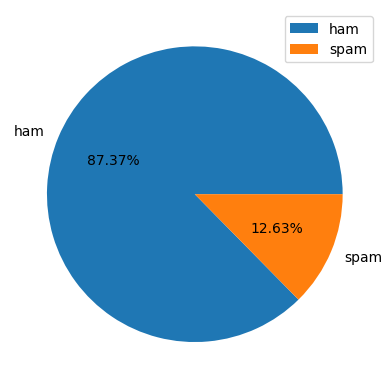

In [48]:
plt.pie(data['Category'].value_counts(),labels = ['ham', 'spam'], autopct = "%.2f%%");
plt.legend();

In [49]:
data['num_characters'] = data['Email Text'].apply(len)
data.head()

Category                                         Email Text  num_characters
0      ham  Go until jurong point, crazy.. Available only ...             111
1      ham                      Ok lar... Joking wif u oni...              29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...             155
3      ham  U dun say so early hor... U c already then say...              49
4      ham  Nah I don't think he goes to usf, he lives aro...              61

In [50]:
data['num_words'] = data['Email Text'].apply(lambda x : len(nltk.word_tokenize(x)))
data.head()

Category                                         Email Text  num_characters  \
0      ham  Go until jurong point, crazy.. Available only ...             111   
1      ham                      Ok lar... Joking wif u oni...              29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3      ham  U dun say so early hor... U c already then say...              49   
4      ham  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [51]:
data['num_sent'] = data['Email Text'].apply(lambda x : len(nltk.sent_tokenize(x)))
data.head()

Category                                         Email Text  num_characters  \
0      ham  Go until jurong point, crazy.. Available only ...             111   
1      ham                      Ok lar... Joking wif u oni...              29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3      ham  U dun say so early hor... U c already then say...              49   
4      ham  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sent  
0         24         2  
1          8         2  
2         37         2  
3         13         1  
4         15         1

In [52]:
data.describe()

num_characters    num_words     num_sent
count     5169.000000  5169.000000  5169.000000
mean        78.977945    18.455794     1.965564
std         58.236293    13.324758     1.448541
min          2.000000     1.000000     1.000000
25%         36.000000     9.000000     1.000000
50%         60.000000    15.000000     1.000000
75%        117.000000    26.000000     2.000000
max        910.000000   220.000000    38.000000

In [53]:
data[data['Category'] == 'ham'].describe()

num_characters    num_words     num_sent
count     4516.000000  4516.000000  4516.000000
mean        70.459256    17.123782     1.820195
std         56.358207    13.493970     1.383657
min          2.000000     1.000000     1.000000
25%         34.000000     8.000000     1.000000
50%         52.000000    13.000000     1.000000
75%         90.000000    22.000000     2.000000
max        910.000000   220.000000    38.000000

In [54]:
data[data['Category'] == 'spam'].describe()

num_characters   num_words    num_sent
count      653.000000  653.000000  653.000000
mean       137.891271   27.667688    2.970904
std         30.137753    7.008418    1.488425
min         13.000000    2.000000    1.000000
25%        132.000000   25.000000    2.000000
50%        149.000000   29.000000    3.000000
75%        157.000000   32.000000    4.000000
max        224.000000   46.000000    9.000000

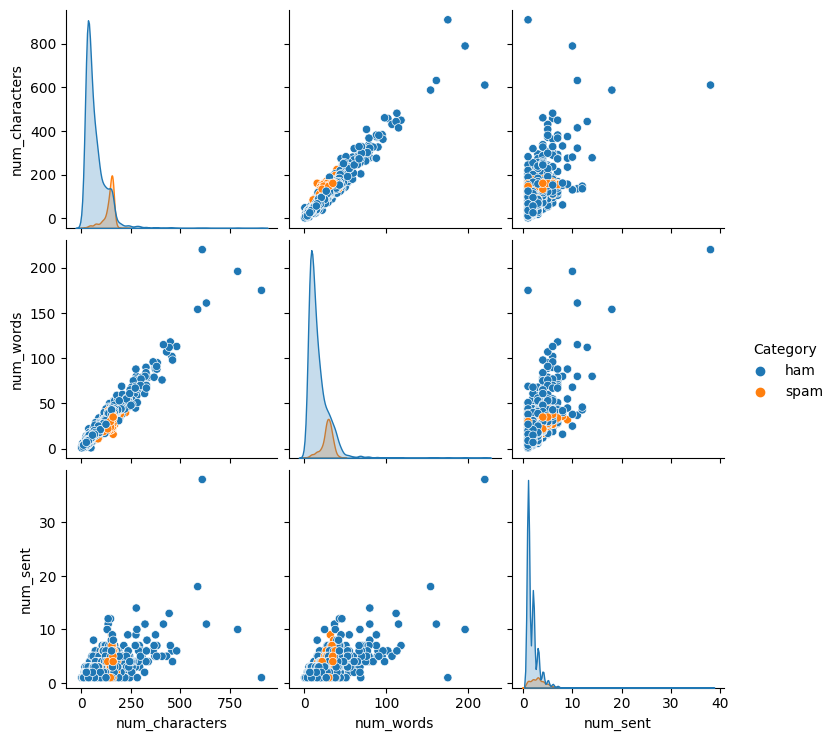

In [55]:
sns.pairplot(data, hue = 'Category')

In [56]:
data.corr()

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_8292\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


num_characters  num_words  num_sent
num_characters        1.000000   0.965760  0.624139
num_words             0.965760   1.000000  0.679971
num_sent              0.624139   0.679971  1.000000

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_8292\1679999493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


<AxesSubplot: >

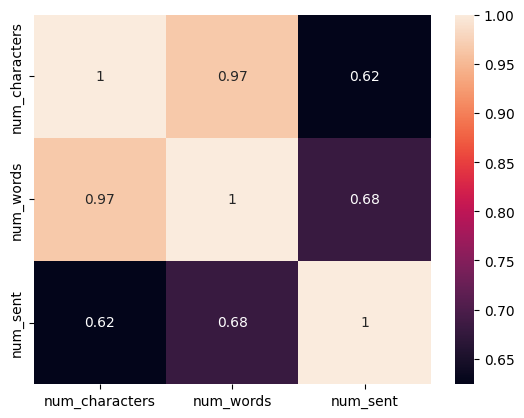

In [57]:
sns.heatmap(data.corr(), annot = True)

## **3. Data Preprocessing**

* Lower Cases
* Tokenization
* Removing Special Character
* Removing stop Words and punctuation
* Stemming

In [58]:
port_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

In [59]:
# Create a function to generate cleaned data from raw text
def clean_text(text):
    text = word_tokenize(text) # Create tokens
    text= " ".join(text) # Join tokens
    text = [char for char in text if char not in string.punctuation] # Remove punctuations
    text = ''.join(text) # Join the leters
    text = [char for char in text if char not in re.findall(r"[0-9]", text)] # Remove Numbers
    text = ''.join(text) # Join the leters
    text = [word.lower() for word in text.split() if word.lower() not in set(stopwords.words('english'))] # Remove common english words (I, you, we,...)
    text = ' '.join(text) # Join the leters
    # text = list(map(lambda x: lan_stemmer.stem(x), text.split()))
    text = list(map(lambda x: port_stemmer.stem(x), text.split()))
    # text = list(map(lambda x: lemmatizer.lemmatize(x), text.split()))
    return " ".join(text)   # error word

In [60]:
data['Clean Email'] = data['Email Text'].apply(clean_text)

In [61]:
data.columns

Index(['Category', 'Email Text', 'num_characters', 'num_words', 'num_sent',
       'Clean Email'],
      dtype='object')

In [62]:
data.head(10)

Category                                         Email Text  num_characters  \
0      ham  Go until jurong point, crazy.. Available only ...             111   
1      ham                      Ok lar... Joking wif u oni...              29   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3      ham  U dun say so early hor... U c already then say...              49   
4      ham  Nah I don't think he goes to usf, he lives aro...              61   
5     spam  FreeMsg Hey there darling it's been 3 week's n...             148   
6      ham  Even my brother is not like to speak with me. ...              77   
7      ham  As per your request 'Melle Melle (Oru Minnamin...             160   
8     spam  WINNER!! As a valued network customer you have...             158   
9     spam  Had your mobile 11 months or more? U R entitle...             154   

   num_words  num_sent                                        Clean Email  
0         24         2  go jurong point crazi avail bugi n great world...  
1          8         2                              ok lar joke wif u oni  
2         37         2  free entri wkli comp win fa cup final tkt st m...  
3         13         1                u dun say earli hor u c alreadi say  
4         15         1            nah nt think goe usf live around though  
5         39         4  freemsg hey darl week word back like fun still...  
6         18         2      even brother like speak treat like aid patent  
7         31         2  per request mell mell oru minnaminungint nurun...  
8         32         5  winner valu network custom select receivea å£ ...  
9         31         3  mobil month u r entitl updat latest colour mob...

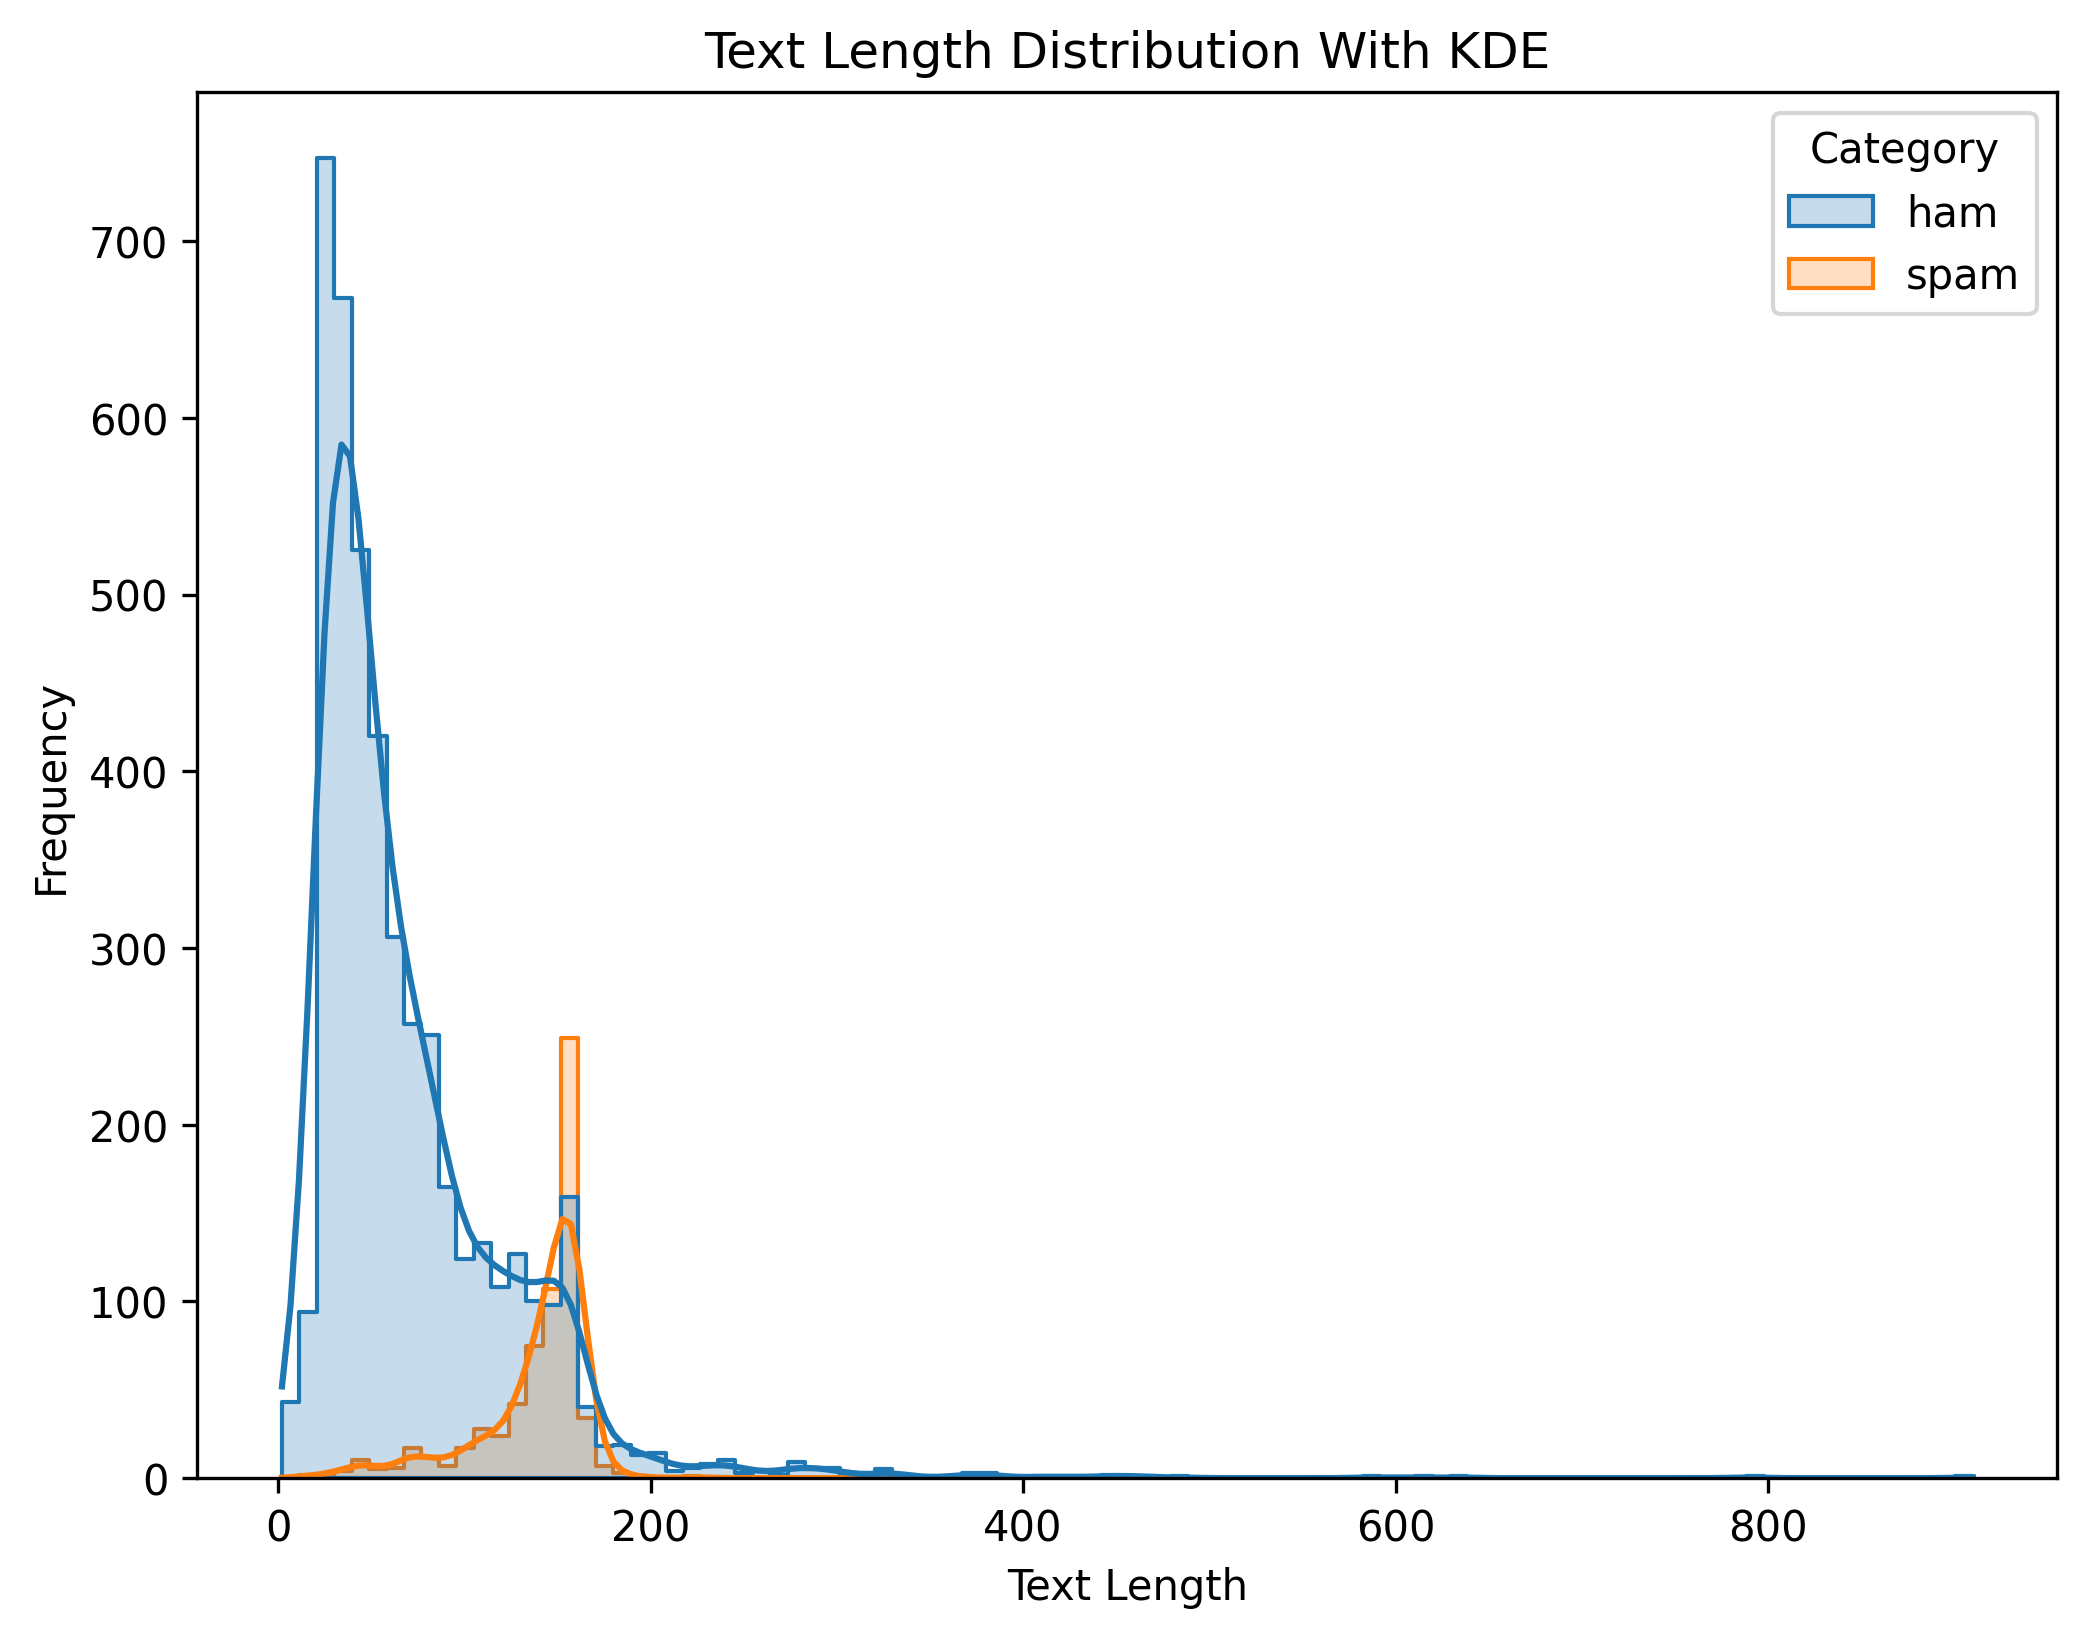

In [98]:
plt.figure(figsize=(8,6),dpi=300)
sns.histplot(data=data,x='num_characters',hue='Category' ,kde=True,element='step')
plt.title('Text Length Distribution With KDE')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_8292\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<AxesSubplot: >

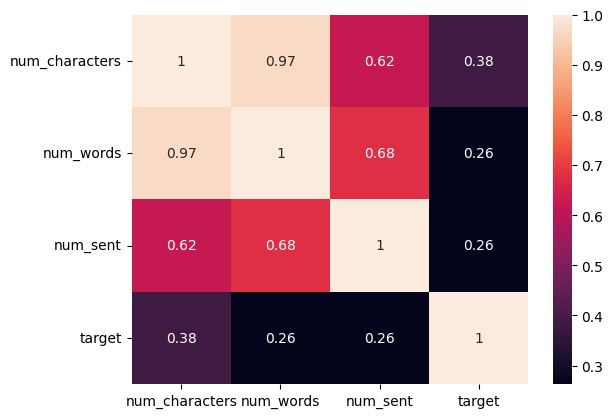

In [94]:
sns.heatmap(data.corr(),annot=True)

In [99]:
from wordcloud import WordCloud
wc = WordCloud(width = 2000, height = 2000, min_font_size = 10, background_color = 'White')

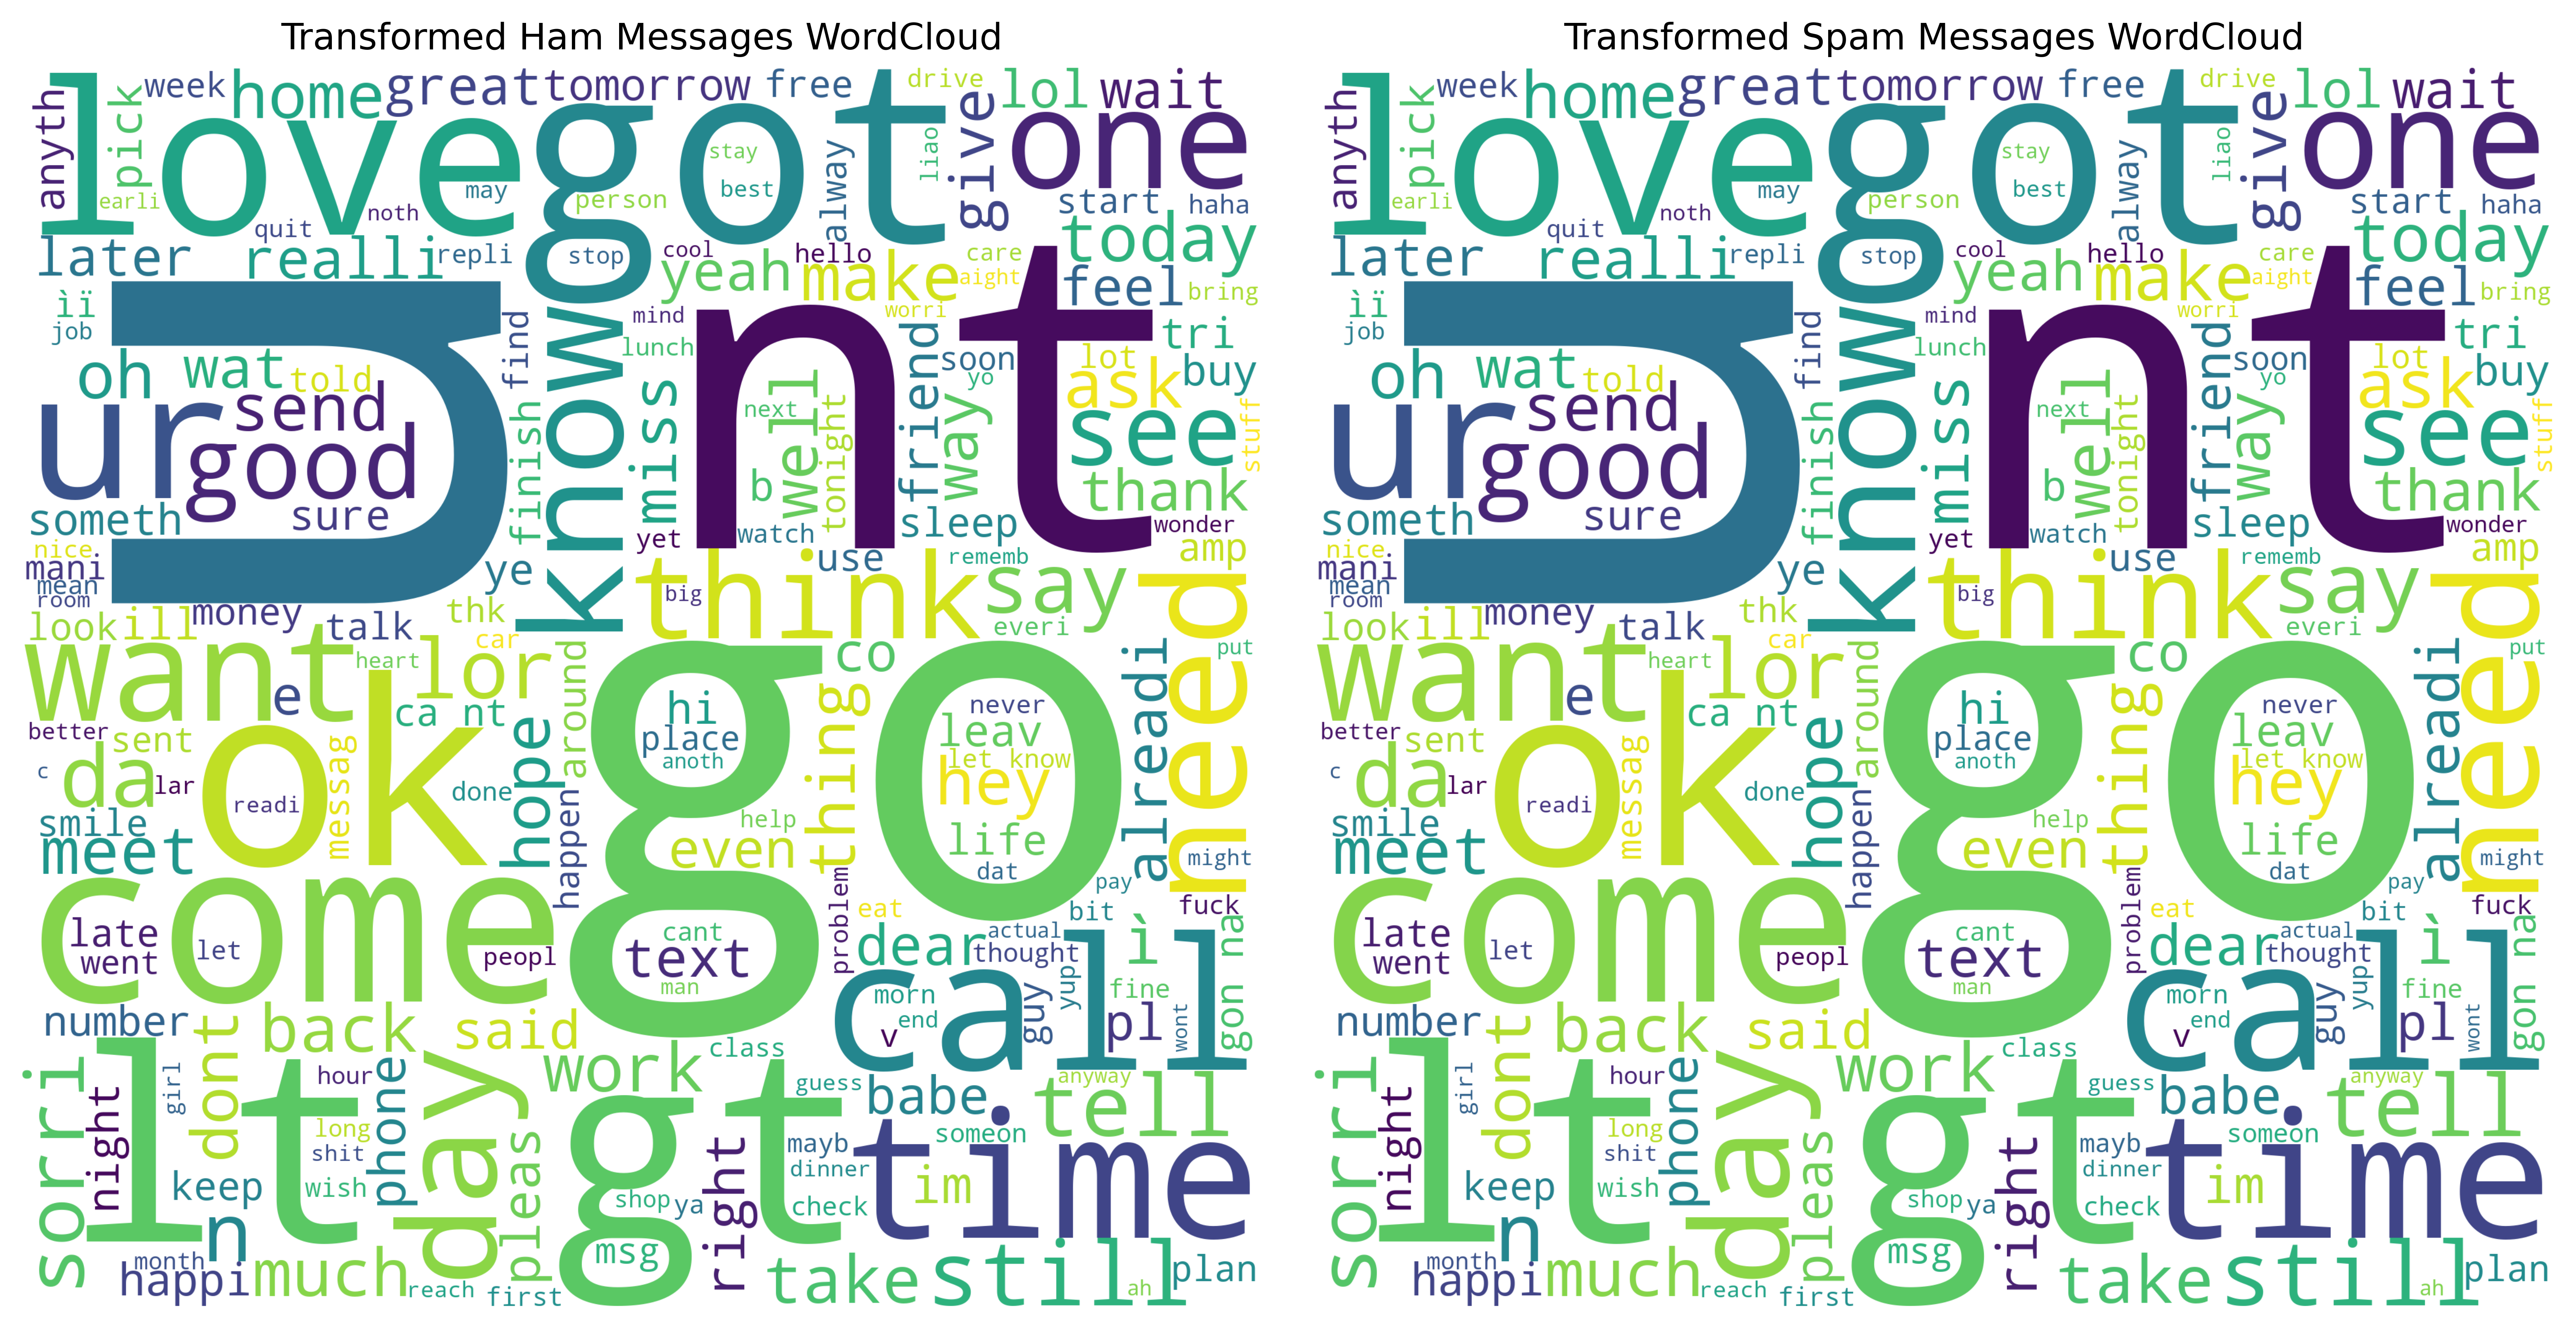

In [100]:
spam_ = wc.generate(data[data['Category']=='spam']['Clean Email'].str.cat(sep = " "));
ham_ = wc.generate(data[data['Category']=='ham']['Clean Email'].str.cat(sep = " "));
plt.figure(figsize=(12,6),dpi=600)

plt.subplot(1,2,1)
plt.imshow(ham_,interpolation='bilinear')
plt.title('Transformed Ham Messages WordCloud')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(spam_,interpolation='bilinear')
plt.title('Transformed Spam Messages WordCloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [65]:
spam_word = []
for msg in data[data['Category'] == 'spam']['Clean Email'].tolist():
  for word in msg.split():
    spam_word.append(word)

In [66]:
len(spam_word)

9529

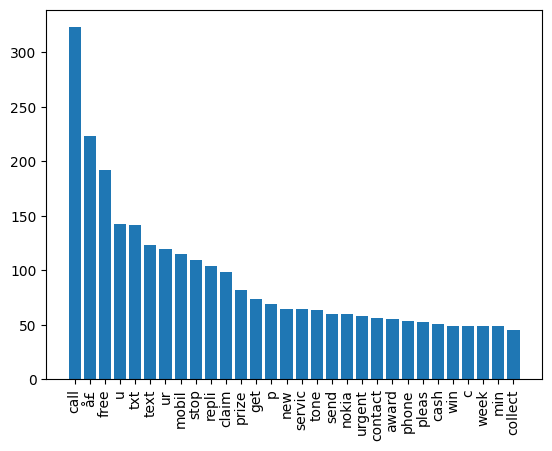

In [67]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(spam_word).most_common(30))[0], pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [68]:
ham_word = []
for msg in data[data['Category'] == 'ham']['Clean Email'].tolist():
  for word in msg.split():
    ham_word.append(word)

In [69]:
len(ham_word)

36001

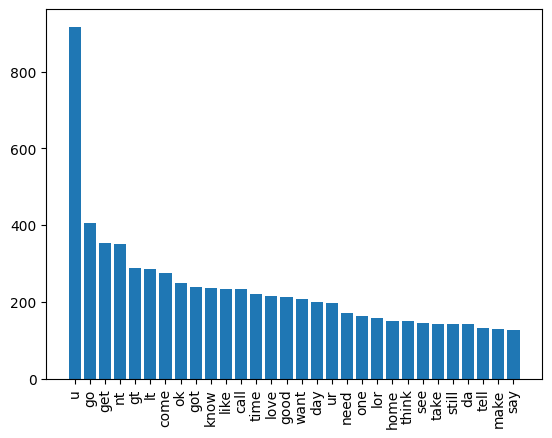

In [70]:
from collections import Counter # Count frequence of word in text
plt.bar(pd.DataFrame(Counter(ham_word).most_common(30))[0], pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation = 'vertical');

In [71]:
from sklearn.preprocessing import LabelEncoder


# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the labels
data['target'] = encoder.fit_transform(data['Category'])

## 4. Model Building

In [72]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

cv = CountVectorizer

In [73]:
# Initialize the TF-IDF vectorizer
tf = TfidfVectorizer(max_features = 3000)

# Fit and transform the text column
X = tf.fit_transform(data['Clean Email']).toarray()
X.shape

(5169, 3000)

In [74]:
y = data['target'].values

In [75]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [78]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score, log_loss

In [79]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [80]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred1)}")
print(confusion_matrix(y_test, y_pred1))
print(f"Precision Score {precision_score(y_test, y_pred1)}")

Accuracy Score: 0.8752417794970987
[[794 102]
 [ 27 111]]
Precision Score 0.5211267605633803


In [81]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(confusion_matrix(y_test, y_pred2))
print(f"Precision Score {precision_score(y_test, y_pred2)}")

Accuracy Score: 0.9738878143133463
[[896   0]
 [ 27 111]]
Precision Score 1.0


In [82]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred3)}")
print(confusion_matrix(y_test, y_pred3))
print(f"Precision Score {precision_score(y_test, y_pred3)}")

Accuracy Score: 0.9816247582205029
[[895   1]
 [ 18 120]]
Precision Score 0.9917355371900827


In [83]:
import pickle

pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

# tf , mnb

In [84]:
sms = "“We’re happy to inform you that you’re entitled to a refund for overpayment on your AMEX account. Click on this link [Link] below to claim your refund.”"

In [85]:
tf_idf = pickle.load(open("vectorizer.pkl", 'rb'))
models = pickle.load(open("model.pkl", 'rb'))

In [86]:
# 1. Preprocess
transformed_sms = clean_text(sms)

# 2. Vectorize
vect_input = tf_idf.transform([transformed_sms])

# 3. Predict
result = models.predict(vect_input)[0]

# 4. Display
if result == 1:
  print("Spam")
else:
  print("Not Spam")

Spam


## Multiple Model

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [88]:
models = []
models.append(('Logistic Regression', LogisticRegression()) )
models.append((('Decision Tree Classifier', DecisionTreeClassifier())))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Naive bayes', MultinomialNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('Support Vector Machine', SVC()))

In [89]:
models

[('Logistic Regression', LogisticRegression()),
 ('Decision Tree Classifier', DecisionTreeClassifier()),
 ('Random Forest Classifier', RandomForestClassifier()),
 ('Naive bayes', MultinomialNB()),
 ('KNeighborsClassifier', KNeighborsClassifier()),
 ('Support Vector Machine', SVC())]

In [90]:
Model = []
Accuracy = []
Precision = []
Recall = []
F1 = []
for name, model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    Model.append(name)
    Accuracy.append(round(accuracy_score(y_test, y_pred), 4) * 100)
    Precision.append(round(precision_score(y_test, y_pred), 4) * 100)
    Recall.append(round(recall_score(y_test, y_pred), 4) * 100)
    F1.append(round(f1_score(y_test, y_pred), 4) * 100)

df = pd.DataFrame({'Model': Model, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall, 'F1 Score':F1})

In [91]:
df = df.sort_values(by = 'Precision', ascending = False).reset_index(drop = True)
df

Model  Accuracy  Precision  Recall  F1 Score
0               Naive bayes     97.39     100.00   80.43     89.16
1      KNeighborsClassifier     90.72     100.00   30.43     46.67
2  Random Forest Classifier     97.10      97.37   80.43     88.10
3    Support Vector Machine     97.10      97.37   80.43     88.10
4       Logistic Regression     95.55      96.94   68.84     80.51
5  Decision Tree Classifier     95.16      80.56   84.06     82.27

In [92]:
df = df.sort_values(by = 'F1 Score', ascending = False).reset_index(drop = True)
df

Model  Accuracy  Precision  Recall  F1 Score
0               Naive bayes     97.39     100.00   80.43     89.16
1  Random Forest Classifier     97.10      97.37   80.43     88.10
2    Support Vector Machine     97.10      97.37   80.43     88.10
3  Decision Tree Classifier     95.16      80.56   84.06     82.27
4       Logistic Regression     95.55      96.94   68.84     80.51
5      KNeighborsClassifier     90.72     100.00   30.43     46.67

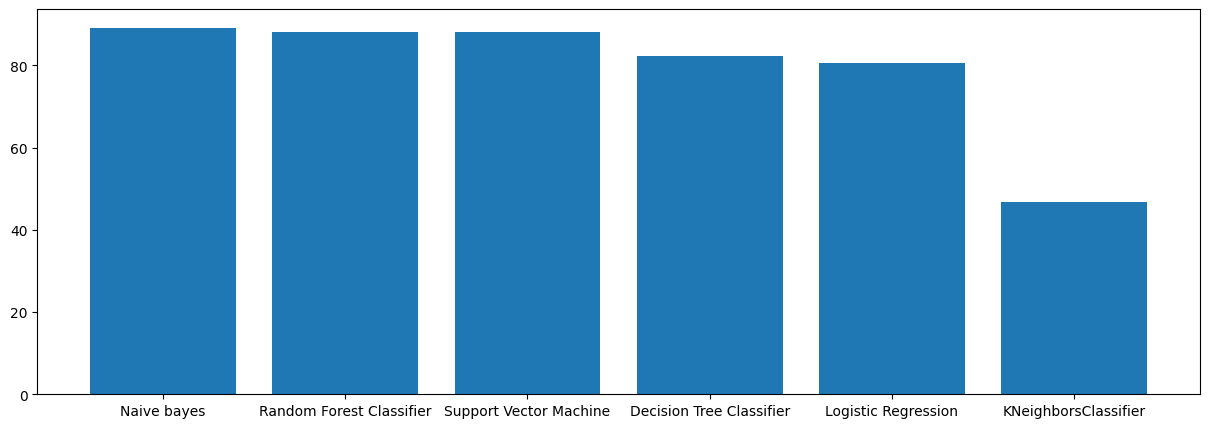

In [93]:
plt.figure(figsize = (15,5))
plt.bar(df['Model'],df['F1 Score']);